# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
363000,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0415,0.0928,0.1440,0.0244,0,0,0,0
126905,0.0024,0.0024,0.0513,0.0269,0.0024,0.0024,0.0684,0.0977,0.0024,0.0342,1,1,4,4
118497,0.0049,0.2026,0.0464,0.0024,0.0024,0.0024,0.0635,0.0659,0.1929,0.1587,1,1,3,3
308858,0.0928,0.0610,0.1465,0.1074,0.0073,0.0073,0.2271,0.2124,0.0586,0.0586,6,6,7,7
107934,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [24]:
num_classes = 24
input_dim = X.shape[1]

In [209]:
from keras.models import Sequential    
model = Sequential()


model.add(Dense(48, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())


model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(24, activation='softmax'))

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())

model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())


model.add(Dense(48, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(num_classes, activation='softmax'))

In [210]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 48)                528       
                                                                 
 batch_normalization_124 (Ba  (None, 48)               192       
 tchNormalization)                                               
                                                                 
 dense_165 (Dense)           (None, 96)                4704      
                                                                 
 batch_normalization_125 (Ba  (None, 96)               384       
 tchNormalization)                                               
                                                                 
 dense_166 (Dense)           (None, 96)                9312      
                                                                 
 batch_normalization_126 (Ba  (None, 96)             

# 2. Compile Network

In [211]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [212]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [213]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 4s 20ms/step - loss: 1.5595 - accuracy: 0.6136 - val_loss: 2.9039 - val_accuracy: 0.5284
Epoch 2/300
75/75 [==============================] - 1s 15ms/step - loss: 1.0396 - accuracy: 0.7319 - val_loss: 2.7097 - val_accuracy: 0.5284
Epoch 3/300
75/75 [==============================] - 1s 14ms/step - loss: 0.8414 - accuracy: 0.7753 - val_loss: 2.5880 - val_accuracy: 0.5284
Epoch 4/300
75/75 [==============================] - 1s 14ms/step - loss: 0.7364 - accuracy: 0.8000 - val_loss: 2.5082 - val_accuracy: 0.5284
Epoch 5/300
75/75 [==============================] - 1s 16ms/step - loss: 0.6757 - accuracy: 0.8135 - val_loss: 2.4386 - val_accuracy: 0.5284
Epoch 6/300
75/75 [==============================] - 1s 15ms/step - loss: 0.6307 - accuracy: 0.8242 - val_loss: 2.3654 - val_accuracy: 0.5284
Epoch 7/300
75/75 [==============================] - 1s 16ms/step - loss: 0.5888 - accuracy: 0.8341 - val_loss: 2.3648 - val_accuracy: 0.5284
Epoch 

75/75 [==============================] - 1s 14ms/step - loss: 0.2650 - accuracy: 0.9232 - val_loss: 0.3888 - val_accuracy: 0.8989
Epoch 59/300
75/75 [==============================] - 1s 14ms/step - loss: 0.2638 - accuracy: 0.9232 - val_loss: 0.3634 - val_accuracy: 0.9009
Epoch 60/300
75/75 [==============================] - 1s 14ms/step - loss: 0.2586 - accuracy: 0.9247 - val_loss: 0.3594 - val_accuracy: 0.9010
Epoch 61/300
75/75 [==============================] - 1s 15ms/step - loss: 0.2646 - accuracy: 0.9228 - val_loss: 0.3743 - val_accuracy: 0.8962
Epoch 62/300
75/75 [==============================] - 1s 14ms/step - loss: 0.2581 - accuracy: 0.9249 - val_loss: 0.3666 - val_accuracy: 0.8997
Epoch 63/300
75/75 [==============================] - 1s 15ms/step - loss: 0.2518 - accuracy: 0.9272 - val_loss: 0.3647 - val_accuracy: 0.8995
Epoch 64/300
75/75 [==============================] - 1s 15ms/step - loss: 0.2570 - accuracy: 0.9249 - val_loss: 0.3555 - val_accuracy: 0.9002
Epoch 65/300

75/75 [==============================] - 1s 13ms/step - loss: 0.2047 - accuracy: 0.9410 - val_loss: 0.3420 - val_accuracy: 0.9121
Epoch 116/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1986 - accuracy: 0.9432 - val_loss: 0.3982 - val_accuracy: 0.8898
Epoch 117/300
75/75 [==============================] - 1s 14ms/step - loss: 0.2017 - accuracy: 0.9422 - val_loss: 0.3247 - val_accuracy: 0.9157
Epoch 118/300
75/75 [==============================] - 1s 14ms/step - loss: 0.2007 - accuracy: 0.9424 - val_loss: 0.3203 - val_accuracy: 0.9153
Epoch 119/300
75/75 [==============================] - 1s 14ms/step - loss: 0.2014 - accuracy: 0.9427 - val_loss: 0.3262 - val_accuracy: 0.9150
Epoch 120/300
75/75 [==============================] - 1s 13ms/step - loss: 0.2026 - accuracy: 0.9422 - val_loss: 0.3366 - val_accuracy: 0.9152
Epoch 121/300
75/75 [==============================] - 1s 14ms/step - loss: 0.2031 - accuracy: 0.9414 - val_loss: 0.3381 - val_accuracy: 0.9105
Epoch 

Epoch 172/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1755 - accuracy: 0.9502 - val_loss: 0.3339 - val_accuracy: 0.9200
Epoch 173/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1770 - accuracy: 0.9497 - val_loss: 0.3361 - val_accuracy: 0.9180
Epoch 174/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1741 - accuracy: 0.9507 - val_loss: 0.3200 - val_accuracy: 0.9197
Epoch 175/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1745 - accuracy: 0.9503 - val_loss: 0.3314 - val_accuracy: 0.9158
Epoch 176/300
75/75 [==============================] - 1s 13ms/step - loss: 0.1761 - accuracy: 0.9499 - val_loss: 0.3202 - val_accuracy: 0.9206
Epoch 177/300
75/75 [==============================] - 1s 13ms/step - loss: 0.1767 - accuracy: 0.9496 - val_loss: 0.3293 - val_accuracy: 0.9180
Epoch 178/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1733 - accuracy: 0.9506 - val_loss: 0.3094 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 1s 15ms/step - loss: 0.1570 - accuracy: 0.9556 - val_loss: 0.3172 - val_accuracy: 0.9228
Epoch 230/300
75/75 [==============================] - 1s 15ms/step - loss: 0.1570 - accuracy: 0.9558 - val_loss: 0.3187 - val_accuracy: 0.9243
Epoch 231/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1550 - accuracy: 0.9564 - val_loss: 0.3235 - val_accuracy: 0.9223
Epoch 232/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1568 - accuracy: 0.9559 - val_loss: 0.3215 - val_accuracy: 0.9238
Epoch 233/300
75/75 [==============================] - 1s 15ms/step - loss: 0.1559 - accuracy: 0.9561 - val_loss: 0.3387 - val_accuracy: 0.9217
Epoch 234/300
75/75 [==============================] - 1s 15ms/step - loss: 0.1570 - accuracy: 0.9558 - val_loss: 0.3125 - val_accuracy: 0.9242
Epoch 235/300
75/75 [==============================] - 1s 15ms/step - loss: 0.1551 - accuracy: 0.9561 - val_loss: 0.3332 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 1s 13ms/step - loss: 0.1493 - accuracy: 0.9579 - val_loss: 0.3303 - val_accuracy: 0.9235
Epoch 287/300
75/75 [==============================] - 1s 12ms/step - loss: 0.1476 - accuracy: 0.9585 - val_loss: 0.3265 - val_accuracy: 0.9247
Epoch 288/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1473 - accuracy: 0.9583 - val_loss: 0.3370 - val_accuracy: 0.9216
Epoch 289/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1495 - accuracy: 0.9582 - val_loss: 0.3343 - val_accuracy: 0.9224
Epoch 290/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1479 - accuracy: 0.9584 - val_loss: 0.3317 - val_accuracy: 0.9258
Epoch 291/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1447 - accuracy: 0.9594 - val_loss: 0.3311 - val_accuracy: 0.9250
Epoch 292/300
75/75 [==============================] - 1s 14ms/step - loss: 0.1436 - accuracy: 0.9597 - val_loss: 0.3219 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

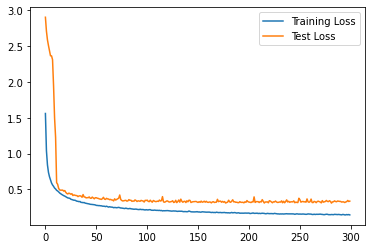

In [214]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

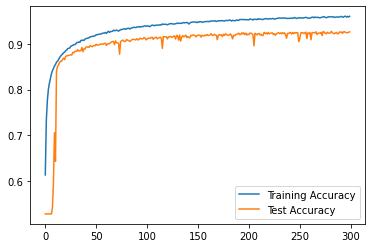

In [215]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [216]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 8s 3ms/step - loss: 0.3355 - accuracy: 0.9260


##  4.3 Make Predictions

In [217]:
predictions = model.predict(X_test)

In [218]:
predictions

array([[9.98801589e-01, 1.49738862e-05, 3.48264875e-05, ...,
        6.30669774e-08, 3.68270108e-08, 1.92971790e-08],
       [1.81902646e-14, 1.34743995e-11, 3.87696636e-15, ...,
        1.82911242e-14, 2.36850973e-11, 9.54664264e-11],
       [9.63529468e-01, 5.35674533e-03, 1.15804677e-03, ...,
        6.14926250e-07, 4.46558306e-06, 1.86560180e-06],
       ...,
       [1.68841190e-08, 1.02127595e-09, 1.45769681e-12, ...,
        1.03293201e-13, 6.87753348e-13, 8.84596148e-14],
       [9.92164969e-01, 5.49235498e-04, 2.41557416e-03, ...,
        7.22335187e-07, 5.38337531e-07, 1.13147225e-08],
       [3.69385613e-14, 9.59914856e-11, 1.91866389e-09, ...,
        1.59642433e-09, 4.38899846e-14, 2.27471335e-13]], dtype=float32)